# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error

# Importing Dataset

In [2]:
dataset = pd.read_csv('Data.csv')

In [3]:
df = dataset.copy()
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


### Checking for null values

In [5]:
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

### Checking for unique

In [6]:
for column, data in df.items():
    unique_number = df[column].nunique()
    print(f'{column} : {unique_number}')

Sample code number : 630
Clump Thickness : 10
Uniformity of Cell Size : 10
Uniformity of Cell Shape : 10
Marginal Adhesion : 10
Single Epithelial Cell Size : 10
Bare Nuclei : 10
Bland Chromatin : 10
Normal Nucleoli : 10
Mitoses : 9
Class : 2


### Correlation of every features with outcome

In [7]:
df_correlation = df.corr()

In [8]:
df_correlation['Class'].sort_values(ascending = False)

Class                          1.000000
Bare Nuclei                    0.822696
Uniformity of Cell Shape       0.821891
Uniformity of Cell Size        0.820801
Bland Chromatin                0.758228
Normal Nucleoli                0.718677
Clump Thickness                0.714790
Marginal Adhesion              0.706294
Single Epithelial Cell Size    0.690958
Mitoses                        0.423448
Sample code number            -0.084701
Name: Class, dtype: float64

## Data Visualisation

### Heat Map

<Axes: >

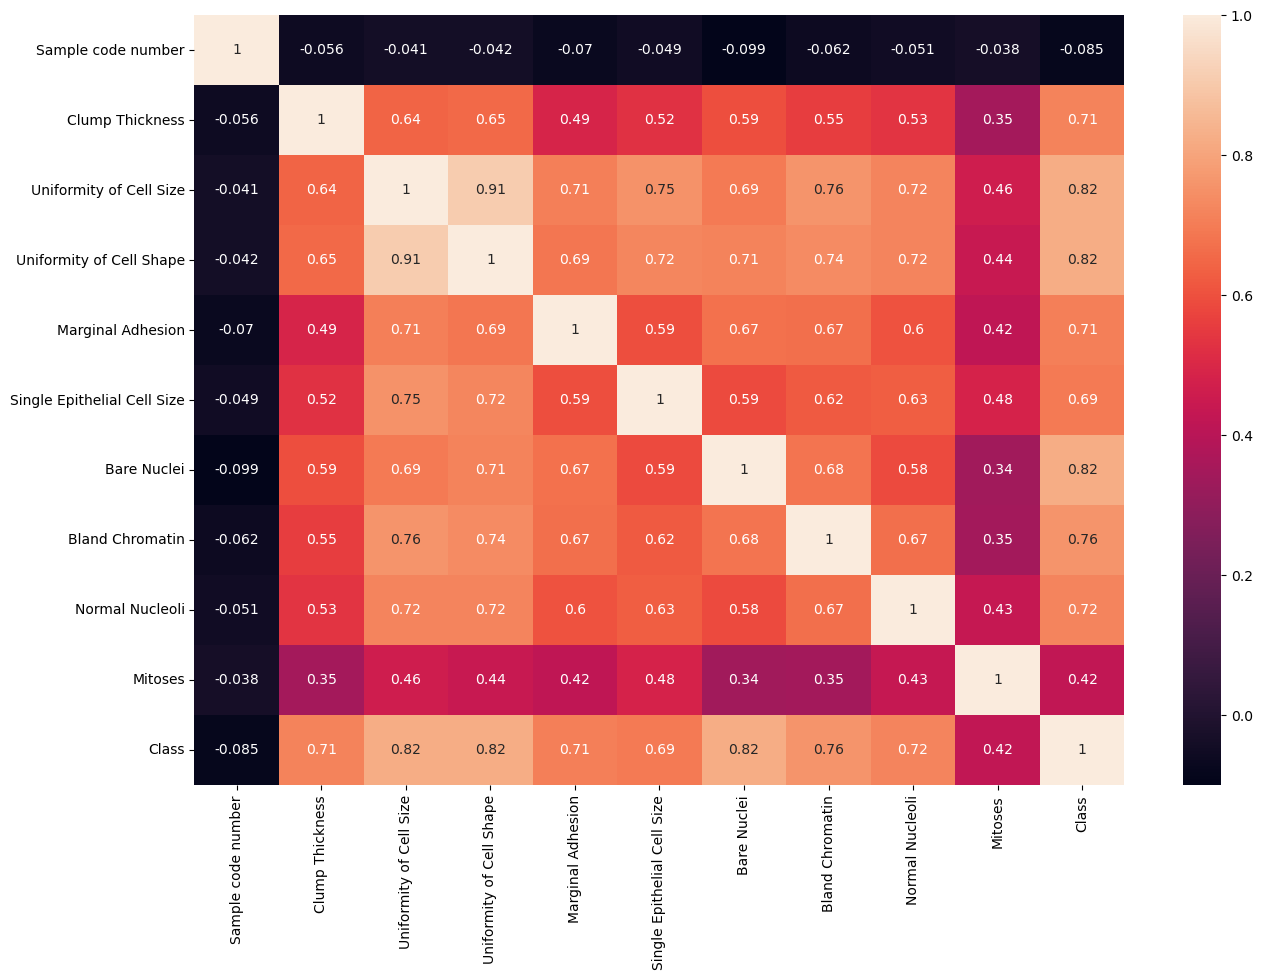

In [9]:
plt.figure(figsize = (15, 10), dpi = 100)
sns.heatmap(df_correlation, annot = True)

### Visualising The Output Result

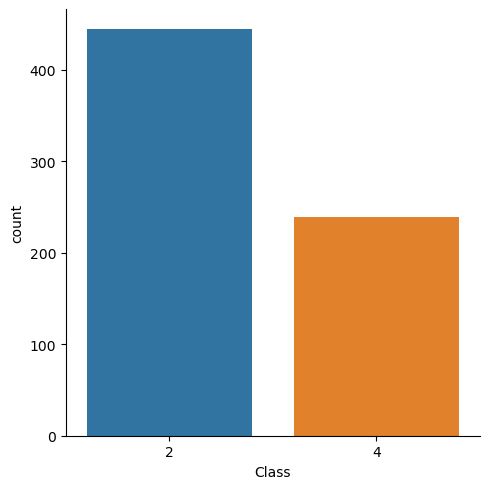

In [10]:
sns.catplot(data = df, x = 'Class', kind = 'count')

### Separatig of Features & Outcomes

In [11]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Splitting into Training & Test Set

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

### Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [14]:
x_train_fs = sc.fit_transform(x_train)
x_test_fs = sc.transform(x_test)

# Model Selection

## 1. Logistic Regression

### Initialising the logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)

### Training the Model

In [ ]:
lr.fit(x_train_fs, y_train)

### Predicting Result For Test Case

In [ ]:
y_pred_lr = lr.predict(x_test_fs)

In [ ]:
np.concatenate((y_pred_lr.reshape(-1,1), y_test.reshape(-1, 1)), axis = 1)

### Making Confusion Metrix & Accuracy Score

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)
accuracy_score(y_test, y_pred_lr)

In [ ]:
mean_squared_error(y_test, y_pred_lr)

## 2. K Nearest Neighbour

### Initialising KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski')

### Training KNN Model

In [ ]:
knnc.fit(x_train_fs, y_train)

### Predicting the value for y_test

In [ ]:
y_pred_knnc = knnc.predict(x_test_fs)

In [ ]:
np.concatenate((y_pred_knnc.reshape(-1,1), y_test.reshape(-1,1)), axis = 1)

In [ ]:
cm_knnc = confusion_matrix(y_test, y_pred_knnc)
print(cm_knnc)
accuracy_score(y_test, y_pred_knnc)

In [ ]:
mean_squared_error(y_test, y_pred_knnc)

## 3.Support Vector Machine

### Initialising The SVM Model

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', random_state = 0)

### Training The Model

In [ ]:
svc.fit(x_train_fs, y_train)

### Predicting the result for Test Case

In [ ]:
y_pred_svc = svc.predict(x_test_fs)

In [ ]:
np.concatenate((y_pred_svc.reshape(-1,1), y_test.reshape(-1, 1)), axis = 1)

In [ ]:
cm_svc = confusion_matrix(y_test, y_pred_svc)
print(cm_svc)
accuracy_score(y_test, y_pred_svc)

In [ ]:
mean_squared_error(y_test, y_pred_svc)

## 4. Naive Bayes

### Initialising the Naive Bayes Model

In [17]:
from sklearn.naive_bayes import GaussianNB
nvc = GaussianNB()

### Training the Naive Bayes Model

In [18]:
nvc.fit(x_train, y_train)

GaussianNB()

### Predicting The result on Test Case

In [19]:
y_pred_nvc = nvc.predict(x_test)

In [20]:
np.concatenate((y_pred_nvc.reshape(-1,1), y_test.reshape(-1,1)), axis = 1)

array([[2, 2],
       [2, 2],
       [2, 4],
       [2, 4],
       [2, 2],
       [2, 2],
       [4, 2],
       [4, 4],
       [4, 2],
       [2, 2],
       [4, 4],
       [2, 2],
       [4, 4],
       [4, 2],
       [2, 2],
       [4, 2],
       [4, 4],
       [4, 4],
       [4, 4],
       [4, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [2, 2],
       [4, 4],
       [4, 4],
       [2, 2],
       [4, 2],
       [2, 2],
       [4, 4],
       [2, 2],
       [2, 4],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [4, 4],
       [2, 2],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [2, 2],
       [2, 2],
       [4, 4],
       [2, 2],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 4],
       [4, 2],
       [2, 2],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2,

In [21]:
cm_nvc = confusion_matrix(y_test, y_pred_nvc)
print(cm_nvc)
accuracy_score(y_test, y_pred_nvc)

[[76 11]
 [12 38]]


0.8321167883211679

In [22]:
mean_squared_error(y_test, y_pred_nvc)

0.6715328467153284

## 5. Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

### Training The dtc model

In [ ]:
dtc.fit(x_train, y_train)

### Predicting the result for test Case

In [ ]:
y_pred_dtc = dtc.predict(x_test)

In [ ]:
np.concatenate((y_pred_dtc.reshape(-1, 1), y_test.reshape(-1, 1)), axis = 1)

In [ ]:
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
print(cm_dtc)
accuracy_score(y_test, y_pred_dtc)

In [ ]:
mean_squared_error(y_test, y_pred_dtc)

## 6. Random Forest Classification

### Initialising the RFC model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)

### Training the RFC model

In [ ]:
rfc.fit(x_train, y_train)

### Predicting the Test Set Result

In [ ]:
y_pred_rfc = rfc.predict(x_test)

In [ ]:
np.concatenate((y_pred_rfc.reshape(-1,1), y_test.reshape(-1,1)), axis = 1)

In [ ]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print(cm_rfc)
accuracy_score(y_test, y_pred_rfc)

# Classification Report

In [ ]:
models_name = ['Logistic Regression', 'K Nearest Neighbors', 'Support Vector Machine', 'Naive Bayes', 'Decision Tree Classification', 'Random Forest Classification']

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report_lr = classification_report(y_test, y_pred_lr)
report_knnc = classification_report(y_test, y_pred_knnc)
report_svc = classification_report(y_test, y_pred_svc)
report_nvc = classification_report(y_test, y_pred_nvc)
report_dtc = classification_report(y_test, y_pred_dtc)
report_rfc = classification_report(y_test, y_pred_rfc)

In [ ]:
class_rep = [report_lr, report_knnc, report_svc, report_nvc, report_dtc, report_rfc]

In [ ]:
for i in range(len(class_rep)):
    print(f'{models_name[i]} Report : \n', class_rep[i])
    print('**********************************************************')